In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPClassifier

In [3]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.io as pio
from IPython.display import Image

In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
total_data = [train_data,test_data]

In [5]:
train_data.shape,test_data.shape

((891, 12), (418, 11))

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


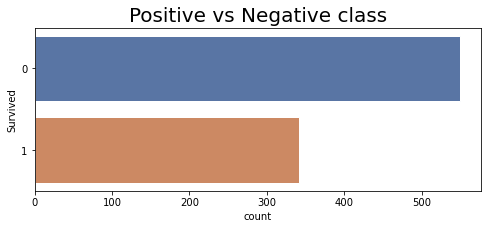

In [7]:
fig, ax = plt.subplots(figsize=(8,3))
sns.set(style="whitegrid")
sns.countplot(y="Survived", data=train_data).set_title("Positive vs Negative class",fontsize=20)
plt.show()

In [8]:
train_data['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
E101           3
              ..
A34            1
C86            1
D47            1
D45            1
C7             1
Name: Cabin, Length: 147, dtype: int64

In [9]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

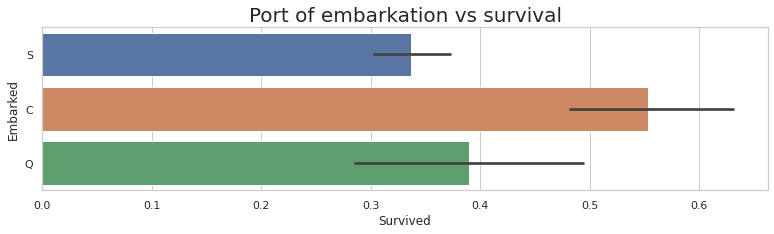

In [10]:
fig, ax = plt.subplots(figsize=(13,3))
sns.set(style="whitegrid")
sns.barplot(x="Survived", y="Embarked", data=train_data).set_title("Port of embarkation vs survival",fontsize=20)
plt.show()


In [11]:
train_data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

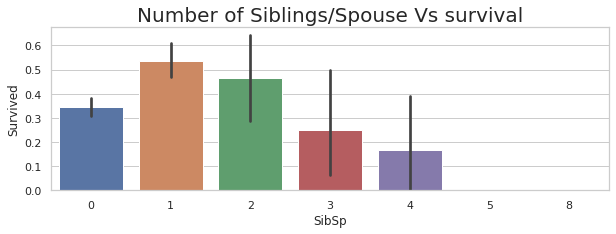

In [12]:
fig, ax = plt.subplots(figsize=(10,3))
sns.set(style="whitegrid")
sns.barplot(x="SibSp", y="Survived", data=train_data).set_title("Number of Siblings/Spouse Vs survival",fontsize=20)
plt.show()

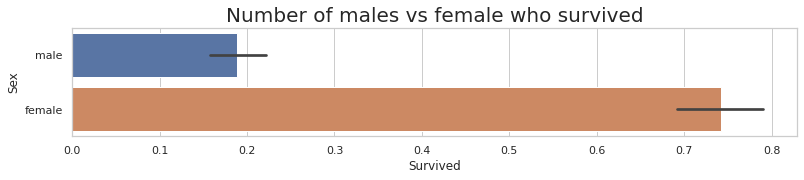

In [13]:


fig, ax = plt.subplots(figsize=(13,2))
sns.set(style="whitegrid")
sns.barplot(x="Survived", y="Sex", data=train_data).set_title("Number of males vs female who survived",fontsize=20)
plt.show()



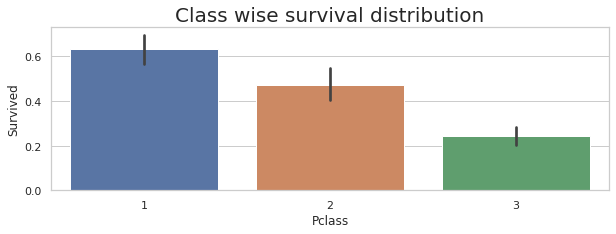

In [14]:
fig, ax = plt.subplots(figsize=(10,3))
sns.set(style="whitegrid")
sns.barplot(x="Pclass", y="Survived", data=train_data).set_title('Class wise survival distribution',fontsize=20)
plt.show()

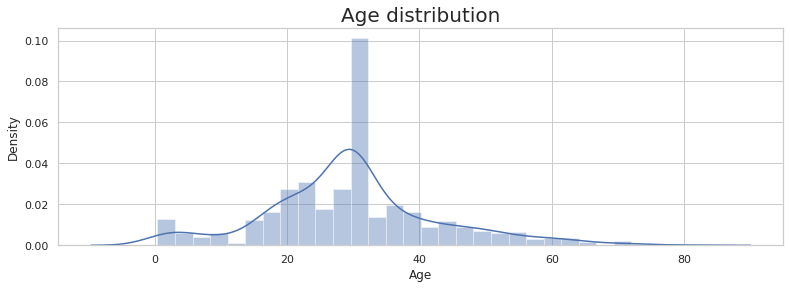

In [15]:
plt.figure(figsize=(13, 4))
sns.distplot(train_data['Age'].fillna(train_data['Age'].mean())).set_title("Age distribution", fontsize=20)
plt.show()


Text(0.5, 1.0, 'Age vs Survival')

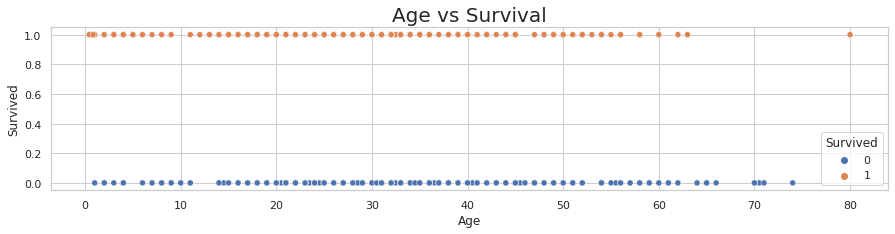

In [16]:
plt.figure(figsize=(15, 3))
sns.scatterplot(x='Age', y='Survived', data=train_data, hue="Survived").set_title("Age vs Survival", fontsize=20)

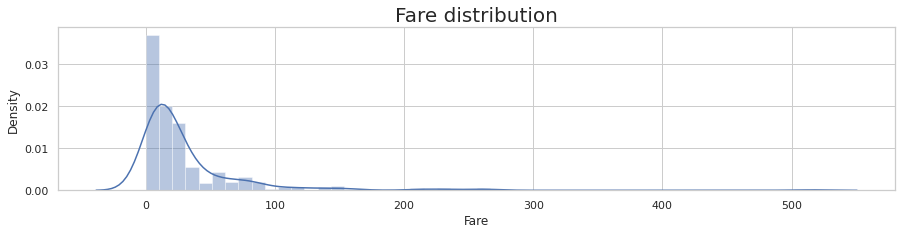

In [17]:
plt.figure(figsize=(15, 3))
sns.distplot(train_data['Fare']).set_title("Fare distribution", fontsize=20)
plt.show()

(0.0, 300.0)

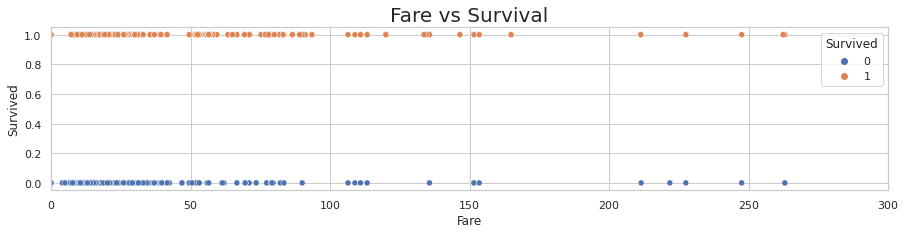

In [18]:
fig, ax = plt.subplots(figsize=(15,3))
sns.set(style="whitegrid")
sns.scatterplot(x='Fare', y='Survived', data=train_data, hue="Survived").set_title("Fare vs Survival", fontsize=20)
plt.xlim(0,300)

Text(0.5, 1.0, 'Sex vs Age')

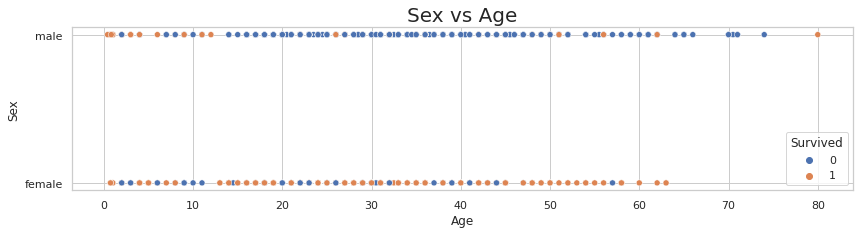

In [19]:
fig, ax = plt.subplots(figsize=(14,3))
sns.set(style="whitegrid")
sns.scatterplot(x="Age", y="Sex", hue="Survived", data=train_data).set_title("Sex vs Age", fontsize=20)

In [20]:
for data in total_data:
    data['Embarked'].fillna('U', inplace=True)
    data['Cabin'].fillna('U', inplace=True)
    data['Parch'].fillna(0, inplace=True)
    data['SibSp'].fillna(0, inplace=True)
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Sex'].fillna('U', inplace=True)
    data['Pclass'].fillna(0, inplace=True)
    data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [21]:
for data in total_data:
    data['Sex'] = data['Sex'].map({'male': 1, 'female': 2, 'U': 3})
    data['Cabin'] = data['Cabin'].apply(lambda x: 0 if x == 'U' else 1)
    data['Embarked'] = data['Embarked'].map({'S': 1, 'C': 2, 'Q': 3, 'U': 4})
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)
    
    # Mapping Age
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4 ;

In [22]:
passenger_ids = test_data['PassengerId']

In [23]:
for data in total_data:
    data.drop(columns=['Name', 'PassengerId', 'Ticket'], inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

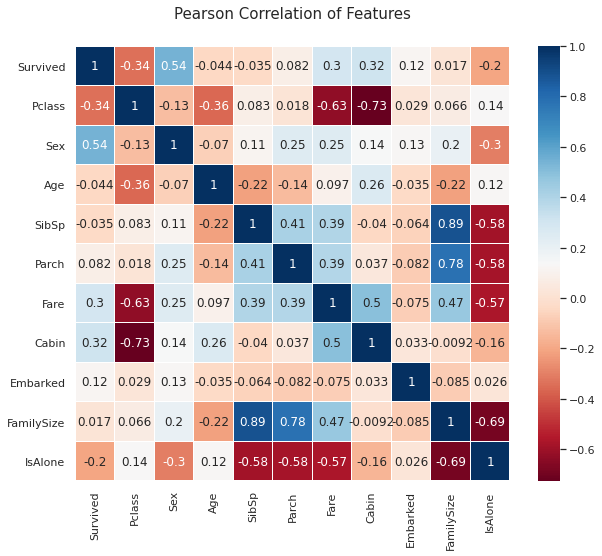

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [25]:
train_data.shape,test_data.shape

((891, 11), (418, 10))

In [26]:
Y = train_data['Survived']
X = train_data.drop(columns=['Survived'])

In [27]:
# clf = LogisticRegression()
# clf = DecisionTreeClassifier(max_depth=6)
# clf = RandomForestClassifier(n_estimators=100, max_depth=12)
clf = GradientBoostingClassifier(n_estimators = 1500, max_depth=7)
# clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=300)
clf

GradientBoostingClassifier(max_depth=7, n_estimators=1500)

In [28]:
scores_train = []
scores_test = []
cv = KFold(n_splits=6, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], Y.loc[train_index], Y.loc[test_index]
    clf.fit(X_train, y_train)
    scores_test.append(clf.score(X_test, y_test))
    scores_train.append(clf.score(X_train, y_train))

In [29]:
print("Average Cross validation score : ", np.array(scores_test).mean())
print("Average Train score : ", np.array(scores_train).mean())

Average Cross validation score :  0.8024820122135559
Average Train score :  0.8976439581647941


In [30]:
preds = clf.predict(test_data)

In [31]:
result = pd.DataFrame({'PassengerId' : np.array(passenger_ids), 'Survived' : preds})

In [32]:
result.to_csv("submission,csv",index = None)

In [33]:
gb_feature = clf.feature_importances_

In [34]:
def plot_feature_importance(algorithm_name, feature_imp):    
    trace = go.Scatter(
        y = feature_imp,
        x = X.columns,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 20,
            color = feature_imp,
            colorscale='Portland',
            showscale=True,
            
        ),
        
        text = X.columns
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= algorithm_name + ' Feature Importance',
        hovermode= 'closest',
        width=800, height=100,
        yaxis=dict(
            title= 'Feature Importance',
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    img_bytes = fig.to_image(format="png")
    return img_bytes

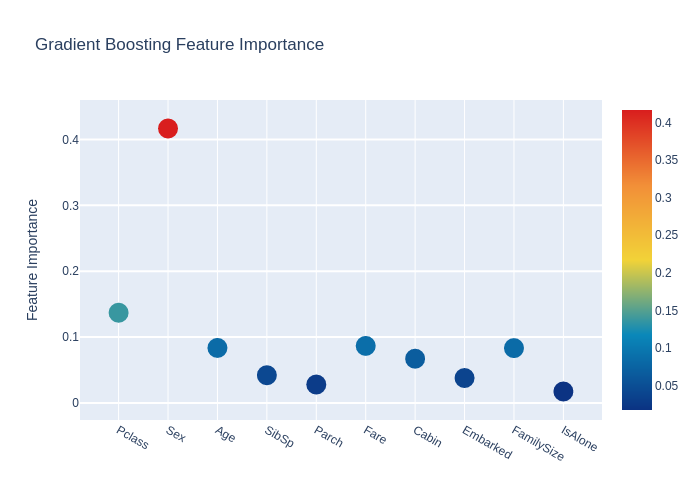

In [35]:


img_bytes = plot_feature_importance("Gradient Boosting", gb_feature)
Image(img_bytes)



In [36]:


# clf = LogisticRegression()
# clf = DecisionTreeClassifier(max_depth=6)
clf = RandomForestClassifier(n_estimators=100, max_depth=15)
clf



RandomForestClassifier(max_depth=15)

In [39]:
scores_train = []
scores_test = []
cv = KFold(n_splits=6, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], Y.loc[train_index], Y.loc[test_index]
    clf.fit(X_train, y_train)
    scores_test.append(clf.score(X_test, y_test))
    scores_train.append(clf.score(X_train, y_train))

In [40]:


print("Average Cross validation score : ", np.array(scores_test).mean())
print("Average Train score : ", np.array(scores_train).mean())



Average Cross validation score :  0.8036005804462181
Average Train score :  0.8976439581647941


In [42]:


rf_feature = clf.feature_importances_




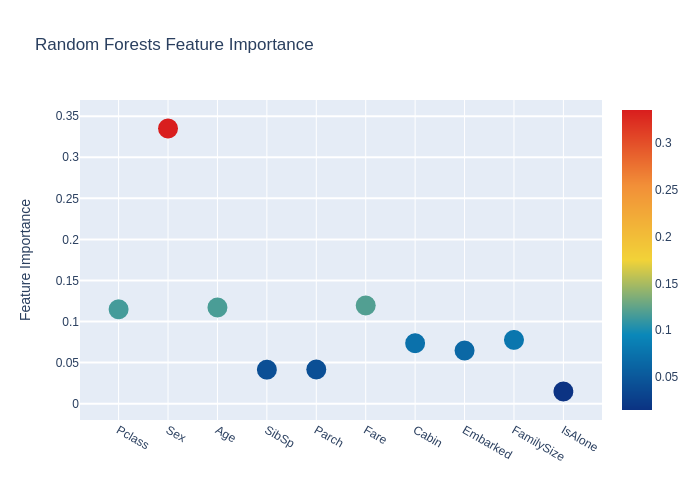

In [43]:
img_bytes = plot_feature_importance("Random Forests", rf_feature)
Image(img_bytes)